In [1]:
import graph_tool.all as gt
import numpy as np

# Generating a Random Flow Graph (Documentation)

[[0.5881308  0.89771373]
 [0.89153073 0.81583748]
 [0.03588959 0.69175758]
 [0.37868094 0.51851095]
 [0.65795147 0.19385022]]


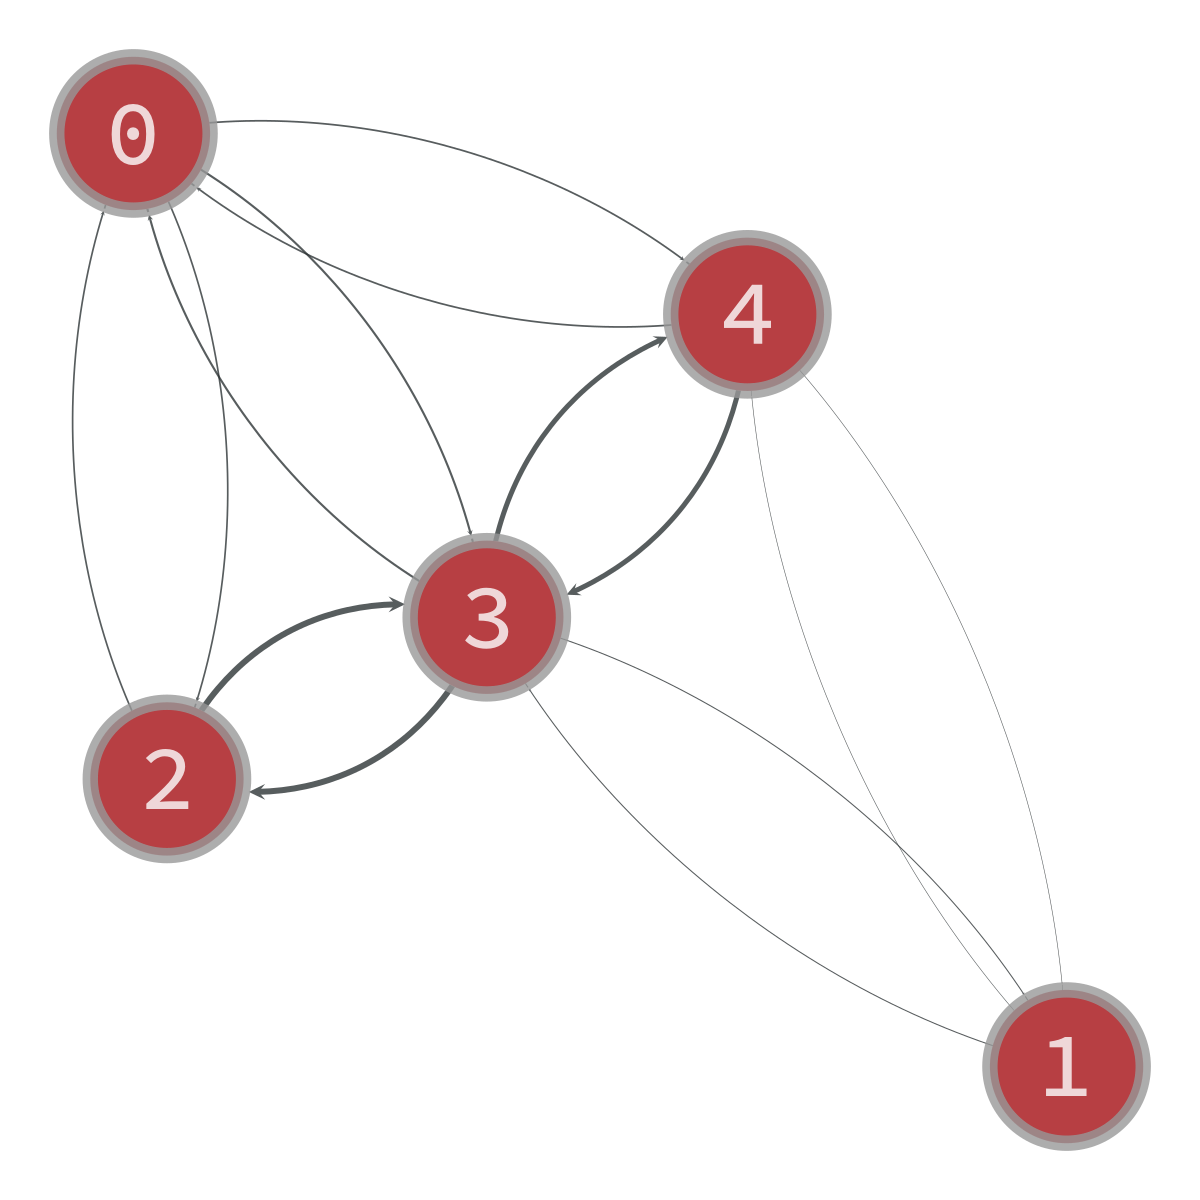

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fcaae257f70, at 0x7fcaae1e42b0>

In [2]:
from numpy.random import seed, random
from scipy.linalg import norm

gt.seed_rng(20)

seed(20)

#arr = np.array([[0.5881308, 0.89771373], [0.89153073, 0.81583748] ,[0.03588959, 0.69175758] ,[0.37868094, 0.51851095] ,[0.65795147, 0.19385022]])

points = random((5, 2))

print(points)
#print(arr)


points[0] = [0, 0]

#print(type(points[0]))

points[1] = [1, 1]

g, pos = gt.triangulation(points, type="delaunay")
g.set_directed(True)
edges = list(g.edges())
# reciprocate edges
for e in edges:
    g.add_edge(e.target(), e.source())
# The capacity will be defined as the inverse euclidean distance
cap = g.new_edge_property("double")
for e in g.edges():
    cap[e] = min(1.0 / norm(pos[e.target()].a - pos[e.source()].a), 10)
g.edge_properties["cap"] = cap
g.vertex_properties["pos"] = pos
g.save("flow-example.xml.gz")
gt.graph_draw(g, pos=pos, vertex_text=g.vertex_index, edge_pen_width=gt.prop_to_size(cap, mi=0, ma=3, power=1))

#print(g.list_properties())

## Maximum Flow Algorithm 

Max Flow: 3.4020748231964593


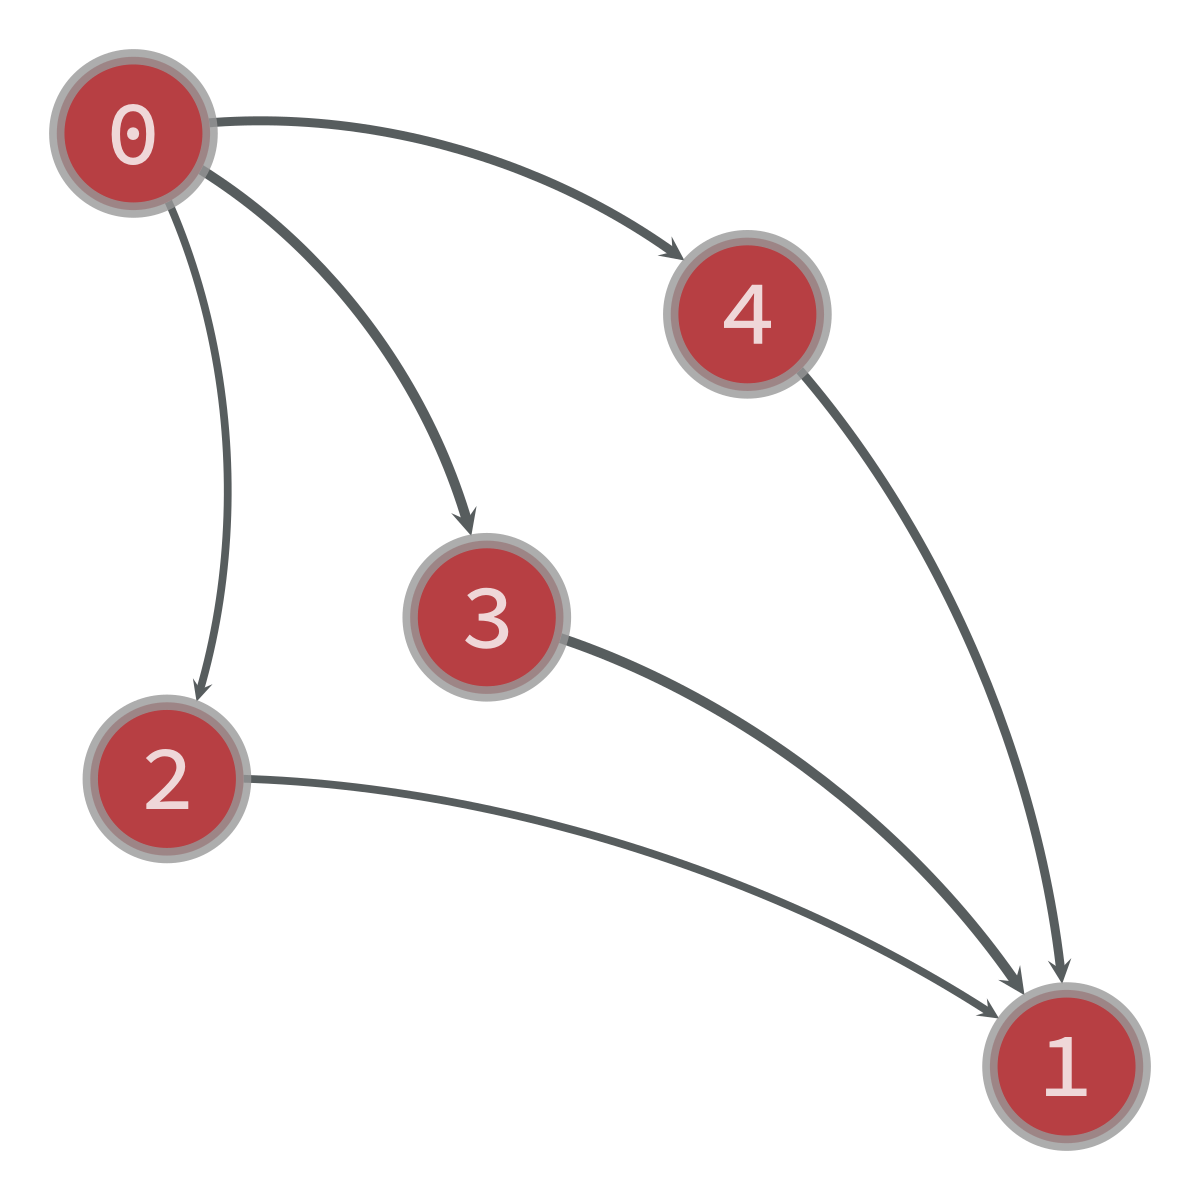

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fcaae2575b0, at 0x7fcaae1e4580>

In [3]:
g = gt.load_graph("flow-example.xml.gz")
cap = g.edge_properties["cap"]
src, tgt = g.vertex(0), g.vertex(1)
res = gt.edmonds_karp_max_flow(g, src, tgt, cap)
res.a = cap.a - res.a  # the actual flow
max_flow = sum(res[e] for e in tgt.in_edges())
print("Max Flow: "+ str(max_flow))
pos = g.vertex_properties["pos"]
gt.graph_draw(g, pos=pos, vertex_text=g.vertex_index, edge_pen_width=gt.prop_to_size(res, mi=0, ma=5, power=1))

# Generating a Random Flow Graph (Playground)

Edge:  (0, 9)  capacidad:  2.8281491601189632
Edge:  (0, 5)  capacidad:  1.3549791425669002
Edge:  (0, 8)  capacidad:  8.437341100252091
Edge:  (0, 3)  capacidad:  2.051117287375727
Edge:  (1, 7)  capacidad:  1.0961521637656595
Edge:  (1, 6)  capacidad:  5.61999694875648
Edge:  (1, 4)  capacidad:  6.244079338502178
Edge:  (1, 5)  capacidad:  1.0737982544099285
Edge:  (2, 9)  capacidad:  2.9105216940179544
Edge:  (2, 3)  capacidad:  2.4544248269490727
Edge:  (2, 5)  capacidad:  2.050455357116893
Edge:  (2, 6)  capacidad:  1.6607417007387373
Edge:  (2, 7)  capacidad:  3.3968379172890812
Edge:  (3, 9)  capacidad:  2.2321195469523603
Edge:  (3, 8)  capacidad:  2.6974945512856627
Edge:  (3, 7)  capacidad:  4.755914737345153
Edge:  (3, 0)  capacidad:  2.051117287375727
Edge:  (3, 2)  capacidad:  2.4544248269490727
Edge:  (4, 6)  capacidad:  10.0
Edge:  (4, 5)  capacidad:  1.2958318601548322
Edge:  (4, 1)  capacidad:  6.244079338502178
Edge:  (5, 9)  capacidad:  2.4009004449753237
Edge:  (5, 

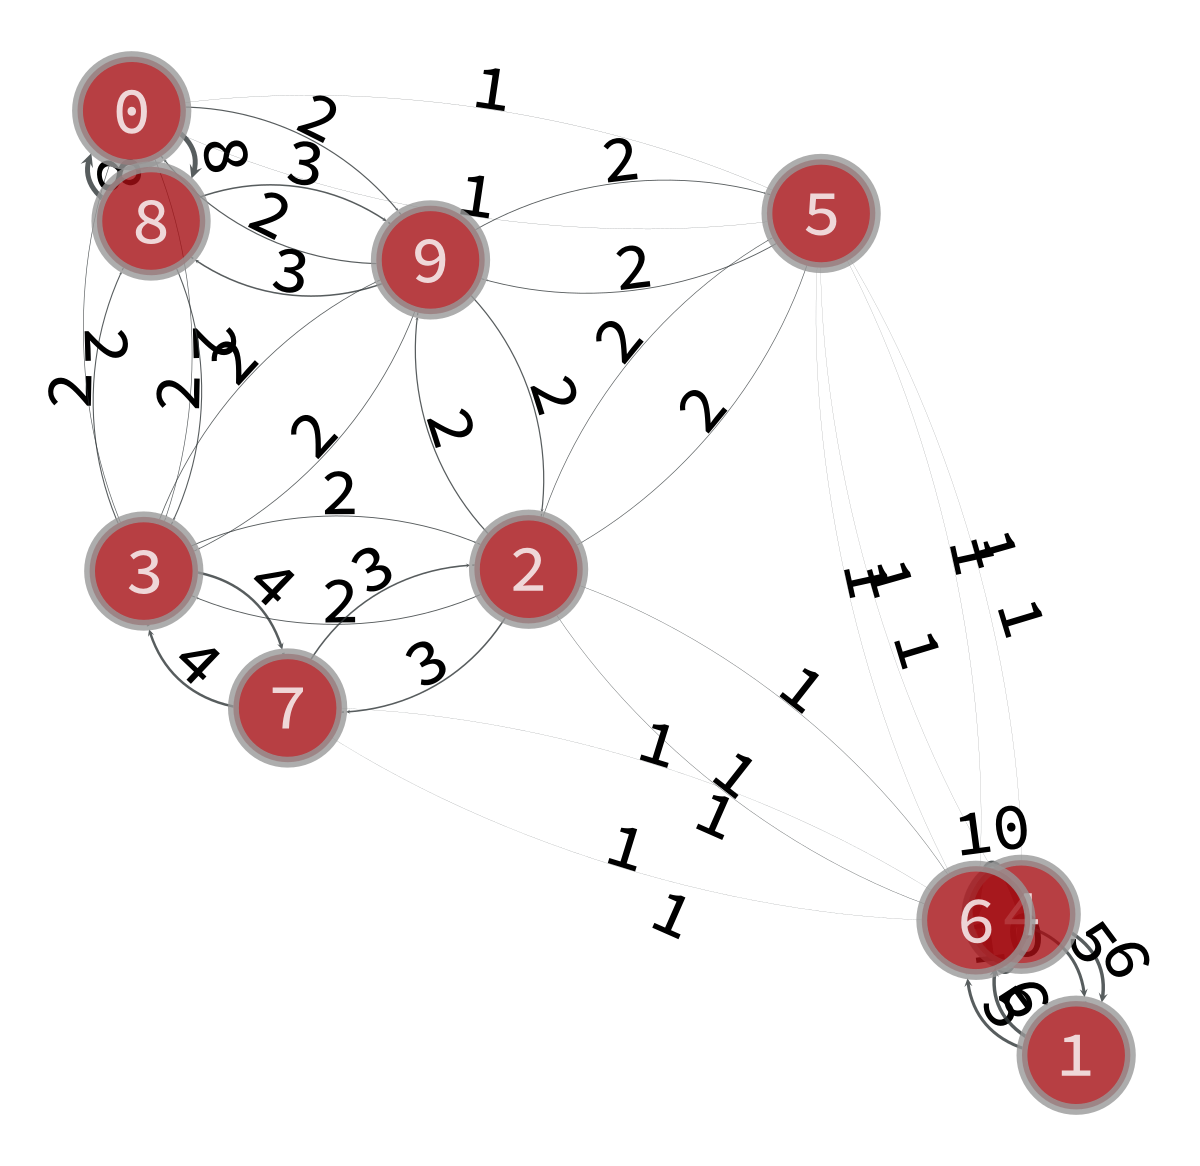

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fcaae21b370, at 0x7fcaae21b640>

In [4]:
from numpy.random import seed, random
from scipy.linalg import norm

gt.seed_rng(11)

seed(11)

points = random((10, 2))
#print(points)

points[0] = [0, 0]

points[1] = [1, 1]

g, pos = gt.triangulation(points, type="delaunay")

g.set_directed(True)
edges = list(g.edges())
# reciprocate edges
for e in edges:
    g.add_edge(e.target(), e.source())
    
# The capacity will be defined as the inverse euclidean distance
cap = g.new_edge_property("double")
edge_str_weight = g.new_edge_property("string")
for e in g.edges():
    cap[e] = min(1.0 / norm(pos[e.target()].a - pos[e.source()].a), 10)
    edge_str_weight[e] = str(int(cap[e]))
    print("Edge: ", e, " capacidad: ", cap[e])
g.edge_properties["cap"] = cap
g.vertex_properties["pos"] = pos
g.save("flow-example.xml.gz")
print(g.get_out_edges(0, [g.edge_index]))
gt.graph_draw(g, pos=pos, vertex_text=g.vertex_index, edge_text=edge_str_weight, edge_pen_width=gt.prop_to_size(cap, mi=0, ma=3, power=1))

Max Flow: 7.742851627652922


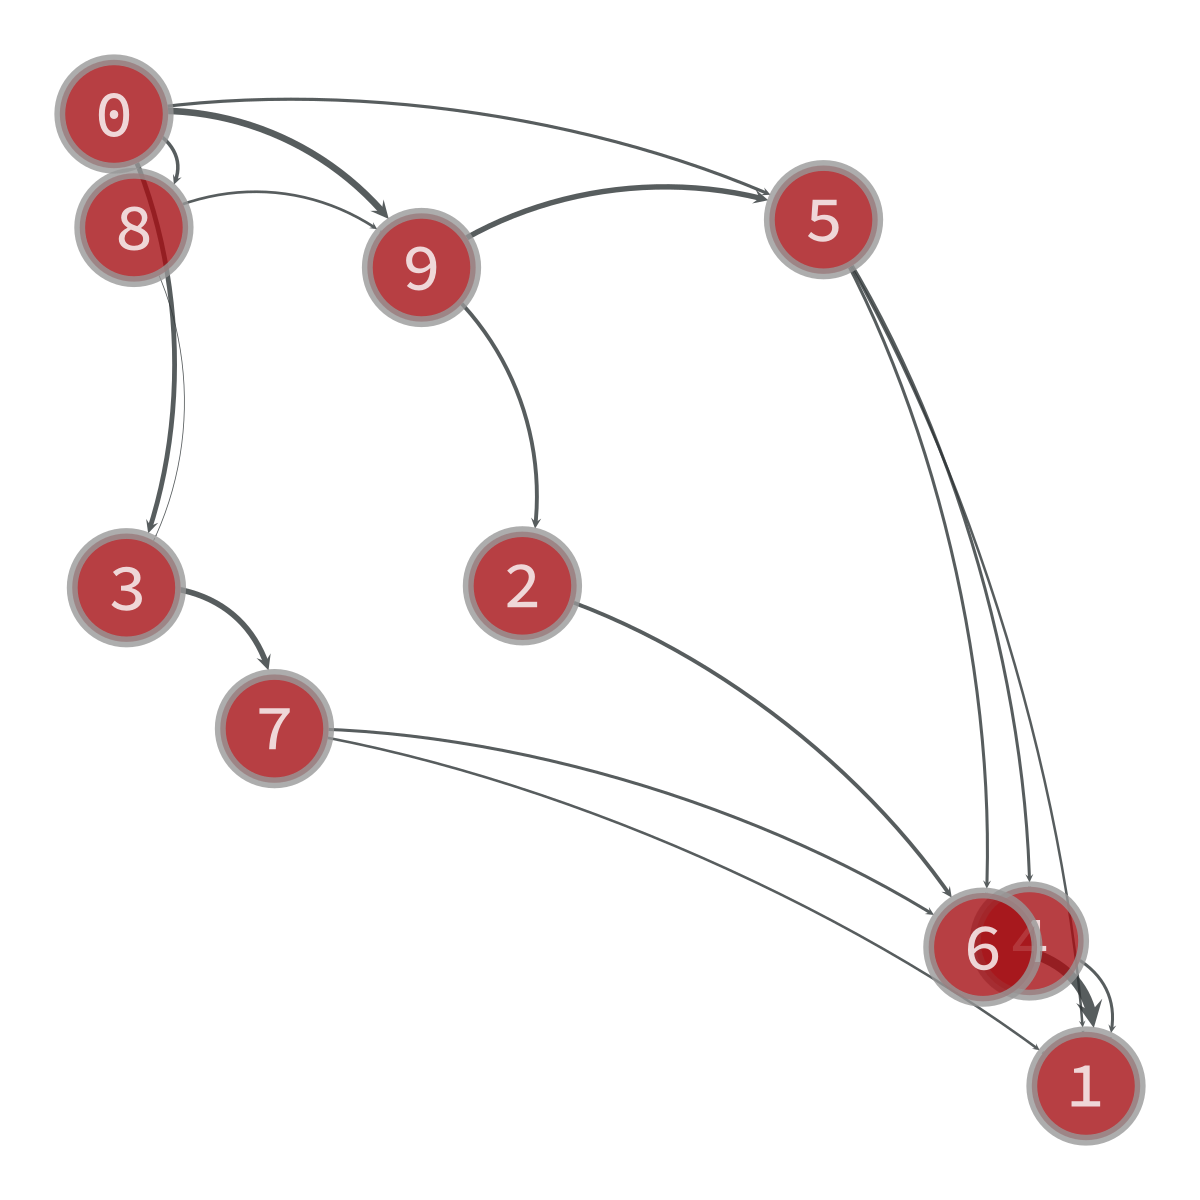

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fcaae2156d0, at 0x7fcaae215370>

In [5]:
g = gt.load_graph("flow-example.xml.gz")
cap = g.edge_properties["cap"]
src, tgt = g.vertex(0), g.vertex(1)
res = gt.edmonds_karp_max_flow(g, src, tgt, cap)
res.a = cap.a - res.a  # the actual flow
max_flow = sum(res[e] for e in tgt.in_edges())
print("Max Flow: "+ str(max_flow))
pos = g.vertex_properties["pos"]
gt.graph_draw(g, pos=pos, vertex_text=g.vertex_index, edge_pen_width=gt.prop_to_size(res, mi=0, ma=5, power=1))

# Test Case No.1 Correlator example from the Paper

<Graph object, directed, with 8 vertices and 11 edges, at 0x7fcaae24a8e0>


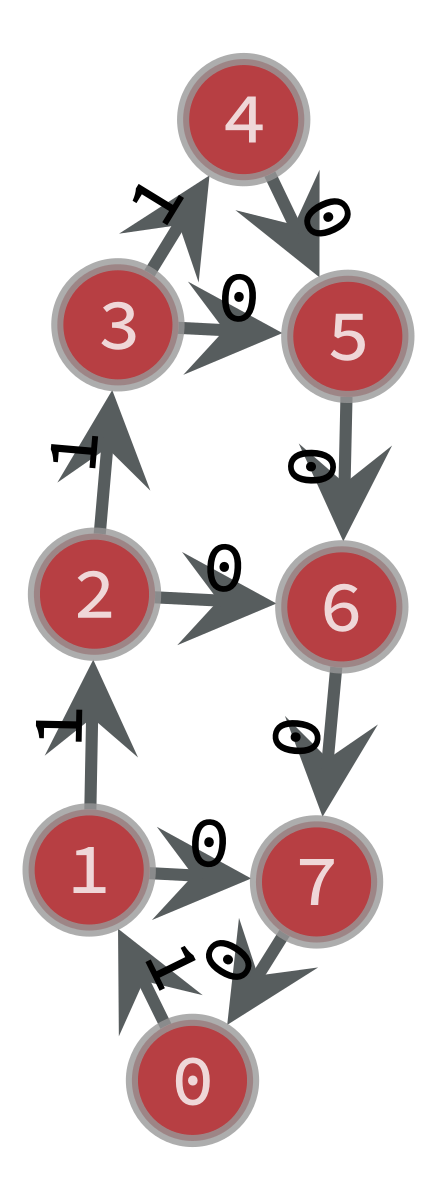

(0, 1)
(1, 7)
(1, 2)
(2, 6)
(2, 3)
(3, 4)
(3, 5)
(4, 5)
(5, 6)
(6, 7)
(7, 0)


In [6]:
g = gt.Graph()

edge_weight = g.new_edge_property("double")
edge_str_weight = g.new_edge_property("string")

g.add_vertex(8) #Creation of vertices. Array V in the example

edges = [[0,1],[1,7],[1,2],[2,6],[2,3],[3,4],[3,5],[4,5],[5,6],[6,7],[7,0]] #array E in the example
weights = [1,0,1,0,1,1,0,0,0,0,0,0] #array w in the example
#print(edges[0][1])

for i in range(len(edges)):
    e = g.add_edge(edges[i][0], edges[i][1])
    #randomNumber = np.random.randint(10)
    edge_weight[e] = weights[i]
    edge_str_weight[e] = str(weights[i])
    
print(g)
gt.graph_draw(g, vertex_text=g.vertex_index, edge_text=edge_str_weight)

for e in g.edges():
    print(e)

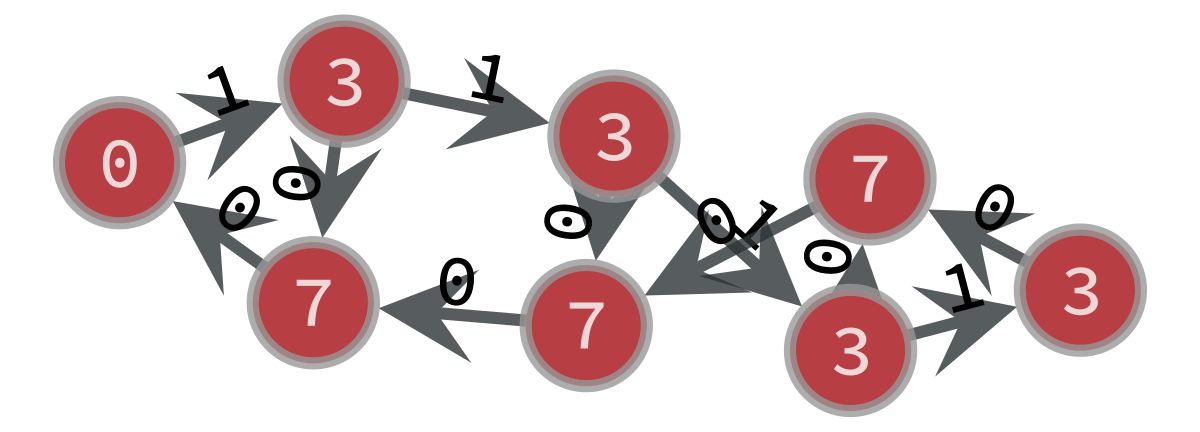

Vertex 0 with capacity: 0
Vertex 1 with capacity: 3
Vertex 2 with capacity: 3
Vertex 3 with capacity: 3
Vertex 4 with capacity: 3
Vertex 5 with capacity: 7
Vertex 6 with capacity: 7
Vertex 7 with capacity: 7


In [94]:
#Current Test
g = gt.Graph()

edge_weight = g.new_edge_property("double")
edge_str_weight = g.new_edge_property("string")

vlist = g.add_vertex(8) #Creation of vertices. Array V in the paper

edges = [[0,1],[1,7],[1,2],[2,6],[2,3],[3,4],[3,5],[4,5],[5,6],[6,7],[7,0]] #array E in the paper

nodeCapacity = [0,3,3,3,3,7,7,7] #Aka "d(node_i)" in the paper

cap = g.new_vertex_property("int")

weights = [1,0,1,0,1,1,0,0,0,0,0,0] #array w in the paper
#print(edges[0][1])

for i in range(len(list(vlist))):
    #g.vp.cap[g.vertex(i)] = nodeCapacity[i] //Documentation Bug
    cap[i] = nodeCapacity[i]

g.vertex_properties["cap"] = cap    

for i in range(len(edges)):
    e = g.add_edge(edges[i][0], edges[i][1])
    #randomNumber = np.random.randint(10)
    edge_weight[e] = weights[i]
    edge_str_weight[e] = str(weights[i])
    
#print(g)
gt.graph_draw(g, vertex_text=g.vp.cap, edge_text=edge_str_weight)

#for e in g.edges():
    #print(e)

for v in g.vertices():
    print("Vertex %s with capacity: %s" % (v, g.vp.cap[v]))
    
#print(g.list_properties())

# Compute WD Algorithm

In [106]:
W = np.zeros((8,8)) #Initialize W Matrix
D = np.zeros((8,8)) #Initialize D Matrix
print(W)
print(D)
#for i in range(8):
#    W[i][i] = -1

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


## Computing W Matrix

In [107]:
#for i in range(8):
#Brute-Force Approach (temporal solution)
#Another Solution Idea: get the permutation pair already in a list and only read it. 

for i in range(8):
    for j in range(8):
        if (i!=j): #Exclude the same node path calculation and DSum
            for path in gt.all_shortest_paths(g, i, j): #Get the shortest path between source and target node.
                print("The path is: %s" % (path))
                print("Length of the path: %s" % (len(path)))

            #Calculate the total weight of the path we just got.
            weightSum = 0
            dSum = 0 #The Sum of the array d(p) in the documentation
            for elem in range(len(path)-1): #The last node must be skipped since it already appears with the penultimate node in the last edge.
    
                #print(i)
                #print(g.edge(path[elem], path[elem+1]))
                #print(edge_weight[g.edge(path[elem], path[elem+1])])
                weightSum = weightSum + edge_weight[g.edge(path[elem], path[elem+1])]
                dSum = dSum + g.vp.cap[g.vertex(path[elem])]
                
            dSum = dSum + g.vp.cap[g.vertex(path[elem+1])] #Assign the final/target node "d(v)"
      
            print("Final Weight Sum of Path: %s : %s" % (path,weightSum))
            W[i][j] = weightSum
            print(W[i][j])
            print("Final D Sum of Path: %s : %s" % (path,dSum))
            D[i][j] = dSum
            print(D[i][j])
        else:
            D[i][j] = g.vp.cap[g.vertex(i)]
            
print("W Matrix: ")
print(W)
print("D Matrix: ")
print(D)

The path is: [0 1]
Length of the path: 2
Final Weight Sum of Path: [0 1] : 1.0
1.0
Final D Sum of Path: [0 1] : 3
3.0
The path is: [0 1 2]
Length of the path: 3
Final Weight Sum of Path: [0 1 2] : 2.0
2.0
Final D Sum of Path: [0 1 2] : 6
6.0
The path is: [0 1 2 3]
Length of the path: 4
Final Weight Sum of Path: [0 1 2 3] : 3.0
3.0
Final D Sum of Path: [0 1 2 3] : 9
9.0
The path is: [0 1 2 3 4]
Length of the path: 5
Final Weight Sum of Path: [0 1 2 3 4] : 4.0
4.0
Final D Sum of Path: [0 1 2 3 4] : 12
12.0
The path is: [0 1 2 3 5]
Length of the path: 5
Final Weight Sum of Path: [0 1 2 3 5] : 3.0
3.0
Final D Sum of Path: [0 1 2 3 5] : 16
16.0
The path is: [0 1 2 6]
Length of the path: 4
Final Weight Sum of Path: [0 1 2 6] : 2.0
2.0
Final D Sum of Path: [0 1 2 6] : 13
13.0
The path is: [0 1 7]
Length of the path: 3
Final Weight Sum of Path: [0 1 7] : 1.0
1.0
Final D Sum of Path: [0 1 7] : 10
10.0
The path is: [1 7 0]
Length of the path: 3
Final Weight Sum of Path: [1 7 0] : 0.0
0.0
Final D

In [52]:
def all_perms(elements):
    if len(elements) <=1:
        yield elements
    else:
        for perm in all_perms(elements[1:]):
            for i in range(len(elements)):
                # nb elements[0:1] works in both string and list contexts
                yield perm[:i] + elements[0:1] + perm[i:]

In [68]:
myList = [1, 2, 3]
permutations = all_perms(myList)
for permutation in permutations:
    print(permutation)

[1, 2, 3]
[2, 1, 3]
[2, 3, 1]
[1, 3, 2]
[3, 1, 2]
[3, 2, 1]


In [11]:
for v in g.vertices():
    print(g.vp.cap[v])
v = g.vertex(0)
g.vp.cap[v] = 117
for v in g.vertices():
    print(g.vp.cap[v])

0
3
3
3
3
7
7
7
117
3
3
3
3
7
7
7


In [12]:
vprop = g.new_vertex_property("double")
g.vp.foo = vprop                        # equivalent to g.vertex_properties["foo"] = vprop
v = g.vertex(0)
g.vp.foo[v] = 4
print(g.vp.foo[v])

4.0


In [13]:
print(g.list_properties())

cap            (vertex)  (type: int32_t)
foo            (vertex)  (type: double)
None
